## Imports

In [432]:
import pandas as pd
import sqlite3

## Make a connection to the database

In [433]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## For the graph
• analyze only the users and not the admins
• the fontsize and the figsize remain the same

In [434]:
sel = """
    SELECT timestamp FROM checker
    WHERE uid LIKE 'user_%';"""

com_df = pd.read_sql(sel, conn, parse_dates=['timestamp'])
com_df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


• for each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue, 17-18: 6 commits, Wed, 17-18: 7 commits

In [435]:
com_df['dow'] = com_df.timestamp.dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
com_df 

,timestamp,dow
0,2020-04-17 05:19:02.744528,working_day
1,2020-04-17 05:22:35.249331,working_day
2,2020-04-17 05:22:45.549397,working_day
3,2020-04-17 05:34:14.691200,working_day
4,2020-04-17 05:34:24.422370,working_day
...,...,...
3202,2020-05-21 20:19:06.872761,working_day
3203,2020-05-21 20:22:41.785725,working_day
3204,2020-05-21 20:22:41.877806,working_day
3205,2020-05-21 20:37:00.129678,working_day


In [436]:
avg_com_df = com_df.groupby(
	by=[com_df.dow, com_df.timestamp.dt.hour, com_df.timestamp.dt.date]).count()
avg_com_df.rename(columns={'timestamp': 'amounts'}, inplace=True)
avg_com_df.head(20)


amounts
dow     timestamp timestamp          
weekend 0         2020-04-19        2
                  2020-04-26        2
                  2020-05-10        2
        1         2020-05-10        6
        3         2020-04-25        1
        5         2020-04-19        2
        7         2020-04-18        1
                  2020-04-25       10
                  2020-04-26        2
                  2020-05-02        3
        8         2020-04-25        8
                  2020-04-26        6
                  2020-05-02        1
                  2020-05-03       13
        9         2020-04-19        2
                  2020-04-25        3
                  2020-05-02        2
                  2020-05-03       11
                  2020-05-10        2
                  2020-05-17        2

In [437]:
avg_com_df = avg_com_df.groupby(level=['dow', 'timestamp']).mean()
avg_com_df

amounts
dow         timestamp           
weekend     0           2.000000
            1           6.000000
            3           1.000000
            5           2.000000
            7           4.000000
            8           7.000000
            9           3.666667
            10          7.000000
            11         23.600000
            12          9.500000
            13         18.000000
            14         12.428571
            15         14.250000
            16         14.800000
            17          7.142857
            18          9.714286
            19         13.125000
            20         13.000000
            21         10.285714
            22          9.833333
            23          6.400000
working_day 0           3.000000
            3           2.000000
            5           7.500000
            6           1.500000
            7           5.166667
            8           3.700000
            9           6.000000
            10         13.200000
            11          6.769231
            12          7.181818
            13          8.111111
            14         10.166667
            15         12.818182
            16         18.888889
            17         16.000000
            18         15.181818
            19         17.833333
            20         14.076923
            21         24.333333
            22          3.750000
            23          5.000000

In [438]:
avg_com_df = avg_com_df.swaplevel(i=0, j=1)
avg_com_df

,,amounts
timestamp,dow,
0,weekend,2.000000
1,weekend,6.000000
3,weekend,1.000000
5,weekend,2.000000
7,weekend,4.000000
8,weekend,7.000000
9,weekend,3.666667
10,weekend,7.000000
11,weekend,23.600000


In [439]:
avg_com_df = avg_com_df.unstack().droplevel(0, axis='columns')
avg_com_df


dow,weekend,working_day
timestamp,,
0,2.000000,3.000000
1,6.000000,NaN
3,1.000000,2.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


In [440]:
avg_com_df.loc[2] = [0, 0]
avg_com_df.loc[4] = [0, 0]
avg_com_df

dow,weekend,working_day
timestamp,,
0,2.000000,3.000000
1,6.000000,NaN
3,1.000000,2.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


In [441]:
avg_com_df.sort_index(axis=0, inplace=True)
avg_com_df

dow,weekend,working_day
timestamp,,
0,2.000000,3.000000
1,6.000000,NaN
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


In [442]:
avg_com_df.fillna(0, inplace=True)
avg_com_df.index.rename('date', inplace=True)
avg_com_df

dow,weekend,working_day
date,,
0,2.000000,3.000000
1,6.000000,0.000000
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


## Choose a palette that you really enjoy, you do not have to replicate it from the graph above

array([<AxesSubplot:title={'center':'weekend'}, xlabel='date'>,
       <AxesSubplot:title={'center':'working_day'}, xlabel='date'>],
      dtype=object)

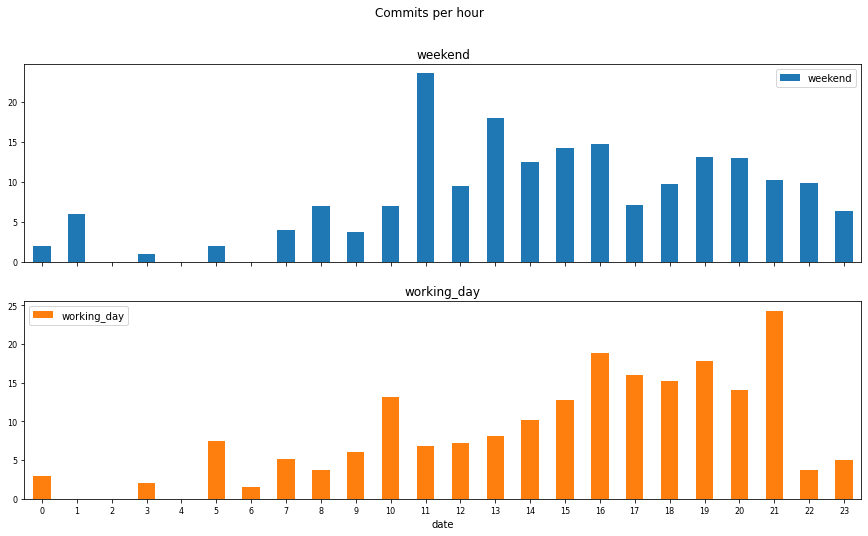

In [443]:
avg_com_df.plot.bar(subplots=True,
                    figsize=(15, 8),
                    fontsize=8,
                    title='Commits per hour',
                    rot=0)

## Disconnect database

In [444]:
conn.close()

## “Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

Yes. The most commits at working_days is made in the evening (21) and on weekends - in the morning (11)